In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import os
import sys

In [3]:
import STAGATE
import scanpy as sc

In [4]:
file = ''
temp = sc.read_visium(file, count_file=r'GSE198353_mmtv_pymt_GEX_filtered_feature_bc_matrix.h5',load_images=True)
temp.var_names_make_unique()

In [5]:
temp

AnnData object with n_obs × n_vars = 1978 × 32286
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [6]:
adata = sc.read_csv('GSE198353_mmtv_pymt_ADT_t.csv')
adata.var_names_make_unique()

In [7]:
adata

AnnData object with n_obs × n_vars = 1978 × 32

In [8]:
temp.obsm

AxisArrays with keys: spatial

In [9]:
adata.obsm=temp.obsm

In [10]:
adata.uns = temp.uns

In [11]:
adata

AnnData object with n_obs × n_vars = 1978 × 32
    uns: 'spatial'
    obsm: 'spatial'

In [12]:
#Normalization
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [13]:
from sklearn.metrics.cluster import adjusted_rand_score

------Calculating spatial graph...
The graph contains 22532 edges, 1978 cells.
11.3913 neighbors per cell on average.


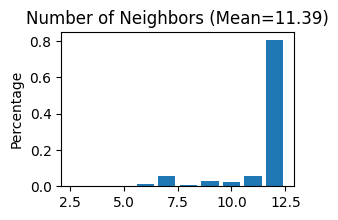

In [14]:
STAGATE.Cal_Spatial_Net(adata, rad_cutoff=150)
STAGATE.Stats_Spatial_Net(adata)

In [15]:
adata = STAGATE.train_STAGATE(adata, alpha=0)

Size of Input:  (1978, 32)


100%|██████████| 500/500 [00:50<00:00,  9.98it/s]


In [16]:
r"C:\Users\KARAN\AppData\Local\R\win-library\4.3\spatialLIBD\data"

'C:\\Users\\KARAN\\AppData\\Local\\R\\win-library\\4.3\\spatialLIBD\\data'

In [20]:
os.environ['R_HOME'] = r"C:\Program Files\R\R-4.3.0"
os.environ['R_USER'] = r"C:\Users\KARAN\anaconda3\envs\STAGATE_PT\Lib\site-packages\rpy2"


In [21]:
sc.pp.neighbors(adata, use_rep='STAGATE')
sc.tl.umap(adata)
adata = STAGATE.mclust_R(adata, used_obsm='STAGATE', num_cluster=5)

OSError: cannot load library 'C:\Program Files\R\R-4.3.0\bin\x64\R.dll': error 0x780

In [ ]:
adata = STAGATE.mclust_R(adata, used_obsm='STAGATE', num_cluster=5)
obs_df = adata.obs.dropna()


fitting ...
  |======================================================================| 100%


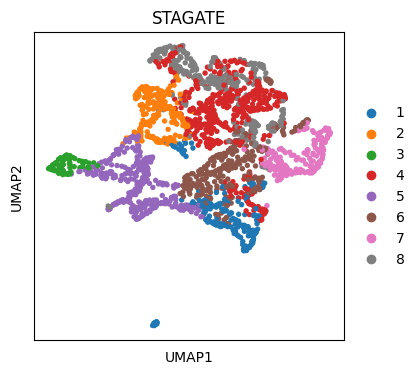

In [ ]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["mclust"], title=['STAGATE'])

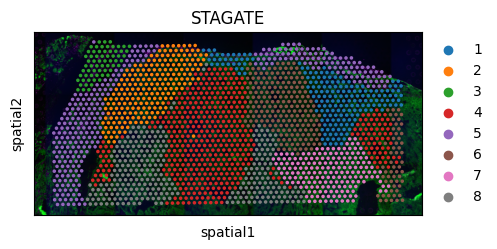

In [ ]:
plt.rcParams["figure.figsize"] = (5, 5)
sc.pl.spatial(adata, color=["mclust"], title=['STAGATE'])

In [ ]:
sc.pp.neighbors(adata, use_rep='STAGATE')
sc.tl.umap(adata)
adata = STAGATE.mclust_R(adata, used_obsm='STAGATE', num_cluster=4)

In [ ]:
adata = STAGATE.mclust_R(adata, used_obsm='STAGATE', num_cluster=4)
obs_df = adata.obs.dropna()


fitting ...
  |======================================================================| 100%


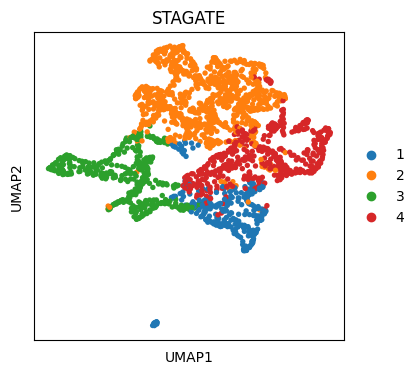

In [ ]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["mclust"], title=['STAGATE'])

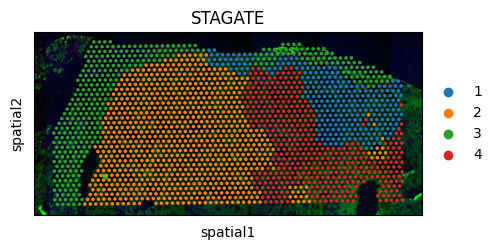

In [ ]:
plt.rcParams["figure.figsize"] = (5, 5)
sc.pl.spatial(adata, color=["mclust"], title=['STAGATE'])

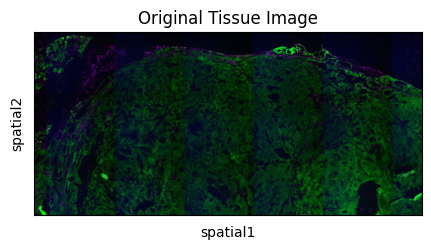

In [ ]:
sc.pl.spatial(adata,  title=['Original Tissue Image'])